In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm 
import math

In [2]:
df = pd.read_csv('data/to_eval/results/2015_G06F_RESULTS_withIPC.csv')
df2 = pd.read_csv('data/to_eval/results/2015_G06F_patents_toeval_RESULTS_surprise.csv')

In [3]:
print(len(df), len(df2))

21100 21100


In [4]:
x_new = list(df['newness_score'])
x_avgdiv = list(df['average divergence_score'])
x_maxdiv = list(df['max divergence_score'])
x_mindiv = list(df['min divergence_score'])
x_uniq = list(df['uniqueness'])
x_deltuniq = list(df['delta uniqueness'])
x_surprise_div = list(df2['divergence_surprise'])
x_surprise_dist = list(df2['distance_surprise'])

x_novel_ipc_direct = list(df['Novel_IPC_direct'])
x_novel_ipc_all = list(df['Novel_IPC_all'])

In [5]:
x_surprise_div = list(df2['divergence_surprise'].fillna(0))

In [6]:
ipc_all_bin = []
for elem in x_novel_ipc_all:
    if elem == 0.0:
        ipc_all_bin.append(0)
    else:
        ipc_all_bin.append(1)

In [7]:
for i in range(len(x_surprise_dist)):
    if math.isinf(x_surprise_dist[i]):
        print(i)
        print(f"It's np.isnan  : {np.isnan(x_surprise_dist)}")

In [8]:
y_label = df2['label']

In [9]:
print('Newness : ', min(x_new),max(x_new))
print('Average divergence_score : ', min(x_avgdiv),max(x_avgdiv))
print('Max divergence_score : ', min(x_maxdiv),max(x_maxdiv))
print('Min divergence_score : ', min(x_mindiv),max(x_mindiv))
print('Uniqueness : ', min(x_uniq),max(x_uniq))
print('Delta uniqueness : ', min(x_deltuniq),max(x_deltuniq))
print('Surprise divergence : ', min(x_surprise_div),max(x_surprise_div))
print('Surprise Distance : ', min(x_surprise_dist),max(x_surprise_dist))

Newness :  0.0737520967507643 390.6601465158704
Average divergence_score :  0.8967801983151795 0.9961702798465571
Max divergence_score :  1.0 1.0
Min divergence_score :  -2.220446049250313e-16 0.8945348893367201
Uniqueness :  0.4971687265030593 0.981343666327004
Delta uniqueness :  -0.5028040817193404 -0.0186291418953958
Surprise divergence :  0.012522154733847 0.3258421996462906
Surprise Distance :  0.1033422206119093 3.171725572601052


### List of best and worst for each metrics

In [8]:
k = 20
print('Newness max : ', list(np.argsort(x_new)[-k:]) , list(np.argsort(x_new)[:k]))
print('Diff max : ', list(np.argsort(x_mindiv)[-k:]), "Newness min : ", list(np.argsort(x_mindiv)[:k]))
print('Uniqueness max : ', list(np.argsort(x_uniq)[-k:]), "Newness min : ", list(np.argsort(x_uniq)[:k]))
print('Surprise max : ', list(np.argsort(x_surprise_div)[-k:]), "Newness min : ", list(np.argsort(x_surprise_div)[:k]))

Newness max :  [8065, 12546, 7497, 11430, 11811, 6099, 11317, 11310, 930, 7302, 8046, 14124, 7510, 8005, 5293, 38, 12838, 12840, 10273, 1594] [2605, 1006, 7726, 15350, 13820, 11000, 2740, 6518, 4307, 4511, 8475, 10410, 1545, 2984, 974, 14348, 13750, 2977, 15640, 314]
Diff max :  [2646, 14836, 11737, 9734, 15990, 4068, 12132, 14280, 6675, 9875, 953, 5535, 2622, 5445, 3181, 5745, 12003, 3691, 11520, 6679] Newness min :  [8785, 3849, 13133, 6190, 11026, 2888, 16885, 15717, 15679, 3077, 4926, 10590, 2553, 13095, 10879, 10875, 15300, 15517, 11769, 16587]
Uniqueness max :  [600, 1863, 10650, 8896, 7510, 15209, 14331, 9580, 2519, 862, 4035, 849, 91, 2690, 9217, 385, 930, 3999, 1774, 1117] Newness min :  [16801, 7005, 2433, 6310, 1423, 13651, 10472, 2295, 7913, 2396, 1857, 14961, 3952, 12332, 7193, 5095, 3816, 8185, 14789, 15438]
Surprise max :  [12186, 11350, 9882, 16977, 1912, 5756, 14308, 894, 291, 6110, 6979, 8178, 2498, 14985, 7063, 2118, 4984, 9875, 10001, 13697] Newness min :  [3733, 81

In [10]:
# Création of variables
def square(x):
    return x**2

def interaction(x,y):
    new_list = []
    assert len(x) == len(y)
    for i in range(len(x)):
        new_list.append(x[i]*y[i])
        
    return new_list

In [11]:
def interaction3(x,y,a):
    new_list = []
    assert len(x) == len(y)
    for i in range(len(x)):
        new_list.append(x[i]*y[i]*a[i])
        
    return new_list

In [12]:
def interaction4(x,y,a,b):
    new_list = []
    assert len(x) == len(y)
    for i in range(len(x)):
        new_list.append(x[i]*y[i]*a[i]*b[i])
        
    return new_list

In [13]:
#SQUARED VARIABLES
x_new_square = [square(x) for x in x_new]
x_avgdiv_square = [square(x) for x in x_avgdiv]
x_mindiv_square = [square(x) for x in x_mindiv]
x_uniq_square = [square(x) for x in x_uniq]
x_deltuniq_square = [square(x) for x in x_deltuniq]
x_surdiv_square = [square(x) for x in x_surprise_div]
x_surdist_square = [square(x) for x in x_surprise_dist]

x_novel_ipc_direct_sqaure = [square(x) for x in x_novel_ipc_direct]
x_novel_ipc_all_sqaure = [square(x) for x in x_novel_ipc_all]

In [14]:
#variables interactions:
x_new_avgdiv = interaction(x_new, x_avgdiv)
x_new_mindiv = interaction(x_new, x_mindiv)
x_new_uniq = interaction(x_new, x_uniq)
x_new_deltuniq = interaction(x_new, x_deltuniq)
x_avgdiv_mindiv = interaction(x_avgdiv, x_mindiv)
x_avgdiv_uniq = interaction(x_avgdiv, x_uniq)
x_avgdiv_deltuniq = interaction(x_avgdiv, x_deltuniq)
x_mindiv_uniq = interaction(x_mindiv, x_uniq)
x_mindiv_deltuniq = interaction(x_mindiv, x_deltuniq)
x_uniq_deltuniq = interaction(x_uniq, x_deltuniq)

#New interaction
x_new_surdiv = interaction(x_new, x_surprise_div)
x_new_surdist = interaction(x_new, x_surprise_dist)
x_mindiv_surdist = interaction(x_mindiv, x_surprise_div)
x_mindiv_surdiv = interaction(x_mindiv, x_surprise_dist)
x_uniq_surdist = interaction(x_uniq, x_surprise_div)
x_uniq_surdiv = interaction(x_uniq, x_surprise_dist)

XXXXx = interaction4(x_uniq, x_new, x_surprise_div, x_mindiv)
XxXX3 = interaction3(x_uniq,x_surprise_div, x_mindiv)


ipc_direct_newness = interaction(x_new, x_novel_ipc_direct)
ipc_all_newness = interaction(x_new, x_novel_ipc_all)
ipc_direct_diff = interaction(x_mindiv, x_novel_ipc_direct)
ipc_all_diff = interaction(x_mindiv, x_novel_ipc_all)
ipc_direct_uniq = interaction(x_uniq, x_novel_ipc_direct)
ipc_all_uniq = interaction(x_uniq, x_novel_ipc_all)
ipc_direct_surpri = interaction(x_surprise_div, x_novel_ipc_direct)
ipc_all_surpri = interaction(x_surprise_div, x_novel_ipc_all)

## Correlation calculation 
Spearman and Pearson

In [ ]:
#Pearson
print('Newness : ', stats.pearsonr(x_new, y_label))
print('Avg Divergence : ', stats.pearsonr(x_avgdiv, y_label))
print('Min Divergence : ', stats.pearsonr(x_mindiv, y_label))
print('Uniqueness : ', stats.pearsonr(x_uniq, y_label))
print('Delta Uniqueness : ', stats.pearsonr(x_deltuniq, y_label))
print('Surprise divergence : ', stats.pearsonr(x_surprise_div, y_label))
print('Surprise distance : ', stats.pearsonr(x_surprise_dist, y_label))
print('===================SQUARE=======================')
print('Newness square : ', stats.pearsonr(x_new_square, y_label))
print('Avg Divergence square : ', stats.pearsonr(x_avgdiv_square, y_label))
print('Min Divergence square : ', stats.pearsonr(x_mindiv_square, y_label))
print('Uniqueness square : ', stats.pearsonr(x_uniq_square, y_label))
print('Delta Uniqueness square : ', stats.pearsonr(x_deltuniq_square, y_label))
print('Surprise divergence : ', stats.pearsonr(x_surdiv_square, y_label))
print('Surprise distance : ', stats.pearsonr(x_surdist_square, y_label))
print('===================INTERACTIONS=======================')
print('Newness Avg Divergence : ', stats.pearsonr(x_new_avgdiv, y_label))
print('Newness Min Divergence : ', stats.pearsonr(x_new_mindiv, y_label))
print('Newness Uniqueness : ', stats.pearsonr(x_new_uniq, y_label))
print('Newness Delta Uniqueness : ', stats.pearsonr(x_new_deltuniq, y_label))
print('Avg Divergence Min Divergence : ', stats.pearsonr(x_avgdiv_mindiv, y_label))
print('Avg Divergence Uniqueness : ', stats.pearsonr(x_avgdiv_uniq, y_label))
print('Avg Divergence Delta Uniqueness : ', stats.pearsonr(x_avgdiv_deltuniq, y_label))
print('Min Divergence Uniqueness : ', stats.pearsonr(x_mindiv_uniq, y_label))
print('Min Divergence Delta Uniqueness : ', stats.pearsonr(x_mindiv_deltuniq, y_label))
print('Uniqueness Delta Uniqueness : ', stats.pearsonr(x_uniq_deltuniq, y_label))

print('Newness Surprise div : ', stats.pearsonr(x_new_surdiv, y_label))
print('Newness Surprise dist : ', stats.pearsonr(x_new_surdist, y_label))
print('Min Divergence Surprise div :', stats.pearsonr(x_mindiv_surdist, y_label))
print('Min Divergence Surprise dist : ', stats.pearsonr(x_mindiv_surdiv, y_label))
print('Uniqueness Surprise div : ', stats.pearsonr(x_uniq_surdist, y_label))
print('Uniqueness Surprise dist : ', stats.pearsonr(x_uniq_surdiv, y_label))

In [15]:
print('IPC Direct : ', stats.pearsonr(x_novel_ipc_direct, y_label))
print('IPC ALL : ', stats.pearsonr(x_novel_ipc_all, y_label))
print('IPC ALL Surprise :', stats.pearsonr(ipc_all_surpri, y_label))
print('IPC Direct Surprise : ', stats.pearsonr(ipc_direct_surpri, y_label))
print('IPC ALL Uniqueness : ', stats.pearsonr(ipc_all_uniq, y_label))
print('IPC Direct Uniqueness : ', stats.pearsonr(ipc_direct_uniq, y_label))
print('IPC ALL difference : ', stats.pearsonr(ipc_all_diff, y_label))
print('IPC Direct difference : ', stats.pearsonr(ipc_direct_diff, y_label))
print('IPC ALL NEW :', stats.pearsonr(ipc_all_newness, y_label))
print('IPC Direct NEW : ', stats.pearsonr(ipc_direct_newness, y_label))

IPC Direct :  PearsonRResult(statistic=0.00368657365193803, pvalue=0.7231816872250632)
IPC ALL :  PearsonRResult(statistic=0.008514113731879583, pvalue=0.41332475874595115)
IPC ALL Surprise : PearsonRResult(statistic=-0.014952038199709248, pvalue=0.15080822113818312)
IPC Direct Surprise :  PearsonRResult(statistic=-0.017925315914025533, pvalue=0.08499433371689745)
IPC ALL Uniqueness :  PearsonRResult(statistic=0.007081974330493579, pvalue=0.49621985573317473)
IPC Direct Uniqueness :  PearsonRResult(statistic=0.002056808994719254, pvalue=0.8433425050920964)
IPC ALL difference :  PearsonRResult(statistic=-0.009871527679846323, pvalue=0.3428819180224721)
IPC Direct difference :  PearsonRResult(statistic=-0.013164976067605902, pvalue=0.2058875072063717)
IPC ALL NEW : PearsonRResult(statistic=0.024626277625707488, pvalue=0.01795869115355658)
IPC Direct NEW :  PearsonRResult(statistic=0.020017569148052985, pvalue=0.054417954705847524)


In [18]:
print(stats.pearsonr(XXXXx, y_label))
print(stats.pearsonr(XxXX3, y_label))


PearsonRResult(statistic=-0.006956402256286304, pvalue=0.32615513194449586)
PearsonRResult(statistic=-0.12975015935887482, pvalue=1.5325249486671605e-75)


between variables

In [16]:
#print('Newness divergence : ', stats.spearmanr(x_new, x_mindiv), stats.pearsonr(x_new, x_mindiv))
#print('Newness Uniqueness : ', stats.spearmanr(x_new, x_uniq), stats.pearsonr(x_new, x_uniq))
#print('Newness Surprise : ', stats.spearmanr(x_new, x_surprise_div), stats.pearsonr(x_new, x_surprise_div))
#print('divergence Uniqueness : ', stats.spearmanr(x_mindiv, x_uniq), stats.pearsonr(x_mindiv, x_uniq))
#print('divergence Surprise : ', stats.spearmanr(x_mindiv, x_surprise_div), stats.pearsonr(x_mindiv, x_surprise_div))
#print('Uniqueness Surprise : ', stats.spearmanr(x_uniq, x_surprise_div), stats.pearsonr(x_uniq, x_surprise_div))

print('IPC Direct NEW: ', stats.pearsonr(x_novel_ipc_direct, x_new))
print('IPC ALL NEW: ', stats.pearsonr(x_novel_ipc_all, x_new))
print('IPC Direct Uniq: ', stats.pearsonr(x_novel_ipc_direct, x_uniq))
print('IPC ALL Uniq: ', stats.pearsonr(x_novel_ipc_all, x_uniq))
print('IPC Direct Diff: ', stats.pearsonr(x_novel_ipc_direct, x_mindiv))
print('IPC ALL Diff: ', stats.pearsonr(x_novel_ipc_all, x_mindiv))
print('IPC Direct Surprise: ', stats.pearsonr(x_novel_ipc_direct, x_surprise_div))
print('IPC ALL Surprise: ', stats.pearsonr(x_novel_ipc_all, x_surprise_div))

IPC Direct NEW:  PearsonRResult(statistic=0.017919024637353256, pvalue=0.08510383821917664)
IPC ALL NEW:  PearsonRResult(statistic=0.017612148686588017, pvalue=0.09058521676604879)
IPC Direct Uniq:  PearsonRResult(statistic=0.04679237346712045, pvalue=6.849652413572854e-06)
IPC ALL Uniq:  PearsonRResult(statistic=0.04733308450786919, pvalue=5.355776472516664e-06)
IPC Direct Diff:  PearsonRResult(statistic=0.07493088992854276, pvalue=5.613771271242905e-13)
IPC ALL Diff:  PearsonRResult(statistic=0.08530659683484007, pvalue=2.188284236902261e-16)
IPC Direct Surprise:  PearsonRResult(statistic=0.033007364880866585, pvalue=0.0015127060895682553)
IPC ALL Surprise:  PearsonRResult(statistic=0.035308706502379855, pvalue=0.0006899468720739043)


### Avec la variable binaire de nouveauté

In [15]:
#Pearson
print('Newness : ', stats.pearsonr(x_new, ipc_all_bin))
print('Min Divergence : ', stats.pearsonr(x_mindiv, ipc_all_bin))
print('Uniqueness : ', stats.pearsonr(x_uniq, ipc_all_bin))
print('Surprise divergence : ', stats.pearsonr(x_surprise_div, ipc_all_bin))

#print('===================SQUARE=======================')
#print('Newness square : ', stats.pearsonr(x_new_square, ipc_all_bin))
#print('Min Divergence square : ', stats.pearsonr(x_mindiv_square, ipc_all_bin))
#print('Uniqueness square : ', stats.pearsonr(x_uniq_square, ipc_all_bin))
#print('Surprise divergence : ', stats.pearsonr(x_surdiv_square, ipc_all_bin))
#
#print('===================INTERACTIONS=======================')
#print('Newness Min Divergence : ', stats.pearsonr(x_new_mindiv, ipc_all_bin))
#print('Newness Uniqueness : ', stats.pearsonr(x_new_uniq, ipc_all_bin))
#print('Min Divergence Uniqueness : ', stats.pearsonr(x_mindiv_uniq, ipc_all_bin))
#print('Newness Surprise div : ', stats.pearsonr(x_new_surdiv, ipc_all_bin))
#print('Min Divergence Surprise div :', stats.pearsonr(x_mindiv_surdist, ipc_all_bin))
#print('Uniqueness Surprise div : ', stats.pearsonr(x_uniq_surdist, ipc_all_bin))
#
#print('IPC Direct : ', stats.pearsonr(x_novel_ipc_direct, ipc_all_bin))
#print('IPC ALL : ', stats.pearsonr(x_novel_ipc_all, ipc_all_bin))
#print('IPC ALL Surprise :', stats.pearsonr(ipc_all_surpri, ipc_all_bin))
#print('IPC Direct Surprise : ', stats.pearsonr(ipc_direct_surpri, ipc_all_bin))
#print('IPC ALL Uniqueness : ', stats.pearsonr(ipc_all_uniq, ipc_all_bin))
#print('IPC Direct Uniqueness : ', stats.pearsonr(ipc_direct_uniq, ipc_all_bin))
#print('IPC ALL difference : ', stats.pearsonr(ipc_all_diff, ipc_all_bin))
#print('IPC Direct difference : ', stats.pearsonr(ipc_direct_diff, ipc_all_bin))
#print('IPC ALL NEW :', stats.pearsonr(ipc_all_newness, ipc_all_bin))
#print('IPC Direct NEW : ', stats.pearsonr(ipc_direct_newness, ipc_all_bin))

print(stats.pearsonr(XXXXx, ipc_all_bin))
print(stats.pearsonr(XxXX3, ipc_all_bin))

Newness :  PearsonRResult(statistic=0.005535032048464331, pvalue=0.42141524122187524)
Min Divergence :  PearsonRResult(statistic=0.08848182009051551, pvalue=6.046915237529377e-38)
Uniqueness :  PearsonRResult(statistic=0.0212569235022006, pvalue=0.0020156785370019853)
Surprise divergence :  PearsonRResult(statistic=0.046284876708557104, pvalue=1.7382468569280343e-11)
PearsonRResult(statistic=0.01392237532456244, pvalue=0.04314330121814159)
PearsonRResult(statistic=0.09748715213788643, pvalue=1.000771050370288e-45)


## Logistic regression

In [34]:

#import pandas as pd  
  
# loading the training dataset  
#df = pd.read_csv('logit_train1.csv', index_col = 0) 
  
# defining the dependent and independent variables 
#Xtrain = df[['gmat', 'gpa', 'work_experience']] 
#ytrain = df[['admitted']] 

In [16]:
#Xtrain = np.column_stack((x_new ,x_avgdiv ,x_mindiv ,x_uniq ,x_deltuniq))
#Xtrain1 = np.column_stack((x_new ,x_avgdiv ,x_uniq ))
Xtrain2 = np.column_stack((x_new , x_mindiv, x_uniq, x_surprise_div, x_novel_ipc_all)) #
Xtrain3 = np.column_stack((x_new , x_mindiv, x_uniq, x_surprise_div)) #
Xtrain_indiv = XxXX3   #XxXX3

In [17]:
#log_reg = sm.Logit(y_label, Xtrain).fit_regularized() 
Xtrain2 = sm.add_constant(Xtrain2)
Xtrain3 = sm.add_constant(Xtrain3)
log_reg = sm.Logit(y_label, Xtrain2).fit()
log_reg2 = sm.Logit(ipc_all_bin, Xtrain3).fit()

Optimization terminated successfully.
         Current function value: 0.502839
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.457508
         Iterations 6


In [18]:
print(log_reg.summary()) 

                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                21100
Model:                          Logit   Df Residuals:                    21094
Method:                           MLE   Df Model:                            5
Date:                Sun, 07 Apr 2024   Pseudo R-squ.:                 0.02613
Time:                        16:27:23   Log-Likelihood:                -10610.
converged:                       True   LL-Null:                       -10895.
Covariance Type:            nonrobust   LLR p-value:                8.054e-121
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1594      0.210     10.287      0.000       1.748       2.571
x1             0.0086      0.003      3.423      0.001       0.004       0.014
x2            -1.2582      0.103    -12.255      0.0

In [19]:
print(log_reg2.summary()) 

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                21100
Model:                          Logit   Df Residuals:                    21095
Method:                           MLE   Df Model:                            4
Date:                Sun, 07 Apr 2024   Pseudo R-squ.:                 0.01082
Time:                        16:27:24   Log-Likelihood:                -9653.4
converged:                       True   LL-Null:                       -9759.0
Covariance Type:            nonrobust   LLR p-value:                 1.512e-44
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6745      0.226    -11.851      0.000      -3.117      -2.232
x1             0.0008      0.002      0.452      0.651      -0.003       0.004
x2             1.3732      0.111     12.410      0.0

## 4 variables

In [33]:
def interaction_mult(x,y, a, b):
    new_list = []
    assert len(x) == len(y)
    for i in range(len(x)):
        new_list.append(x[i]*y[i]*a[i]*b[i])
    return new_list

In [34]:
novelty = interaction_mult(x_new, x_mindiv, x_uniq, x_surprise_div)

In [35]:
print('Novelty : ', stats.pearsonr(novelty, y_label))
print('Novelty : ', stats.spearmanr(novelty, y_label))

Novelty :  PearsonRResult(statistic=0.02265348724988045, pvalue=0.029492348513559797)
Novelty :  SignificanceResult(statistic=-0.08146342402496493, pvalue=4.502053624163733e-15)


In [36]:
#log_reg = sm.Logit(y_label, Xtrain).fit_regularized() 
novelty = sm.add_constant(novelty)
log_reg = sm.Logit(y_label, novelty).fit() 

Optimization terminated successfully.
         Current function value: 0.432023
         Iterations 6


In [37]:
print(log_reg.summary()) 

                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 9234
Model:                          Logit   Df Residuals:                     9232
Method:                           MLE   Df Model:                            1
Date:                Wed, 20 Mar 2024   Pseudo R-squ.:               0.0007236
Time:                        15:28:29   Log-Likelihood:                -3989.3
converged:                       True   LL-Null:                       -3992.2
Covariance Type:            nonrobust   LLR p-value:                   0.01623
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6763      0.029     57.120      0.000       1.619       1.734
x1             0.2849      0.133      2.144      0.032       0.025       0.545


## TEST

In [39]:
test1 = [1 - x for x in x_mindiv]
test2 = [1 - x for x in x_uniq]
test3 = [1 - x for x in x_surprise_div]

In [40]:
print('Novelty : ', stats.pearsonr(test1, y_label))
print('Novelty : ', stats.spearmanr(test1, y_label))
print('Novelty : ', stats.pearsonr(test2, y_label))
print('Novelty : ', stats.spearmanr(test2, y_label))
print('Novelty : ', stats.pearsonr(test3, y_label))
print('Novelty : ', stats.spearmanr(test3, y_label))

Novelty :  PearsonRResult(statistic=0.09648836360149685, pvalue=1.509098573364288e-20)
Novelty :  SignificanceResult(statistic=0.09428166169781423, pvalue=1.0970187487080164e-19)
Novelty :  PearsonRResult(statistic=0.05245366545646544, pvalue=4.576751834537118e-07)
Novelty :  SignificanceResult(statistic=0.053538265868885666, pvalue=2.637198875673819e-07)
Novelty :  PearsonRResult(statistic=0.14743587244605555, pvalue=4.909922066578835e-46)
Novelty :  SignificanceResult(statistic=0.1320128187408071, pvalue=3.558809846356607e-37)


In [52]:
from scipy.spatial import distance
from scipy.special import softmax
from sklearn.metrics.pairwise import euclidean_distances
import math
x = np.array([8,0.2,0.3,0.4,0.5]).reshape(1, -1)
y = np.array([1,1,1,1,1]).reshape(1, -1)
dist_score = euclidean_distances(y,x) / math.sqrt(x.shape[1])
print(dist_score)

current_dist = softmax(x)
expect_dist = softmax(y)
print(current_dist)
print(expect_dist)
div_score = distance.jensenshannon(expect_dist, current_dist, axis=1)
print(div_score)

[[3.18559257]]
[[9.98087566e-01 4.08951388e-04 4.51961181e-04 4.99494353e-04
  5.52026633e-04]]
[[0.2 0.2 0.2 0.2 0.2]]
[0.64518337]


# Polts and Stats

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm 

In [2]:
df = pd.read_csv('data/to_eval/results/2016_G06F_RESULTS.csv')
df2 = pd.read_csv('data/to_eval/results/2016_G06F_patents_toeval_RESULTS_surprise.csv')

In [12]:
df_brev = df2[df2['label'] == 1]
df_nonbrev = df2[df2['label'] == 0]

In [ ]:
#df['newness_score']
#x_avgdiv = list(df['average divergence_score'])
#x_maxdiv = list(df['max divergence_score'])
#x_mindiv = list(df['min divergence_score'])
#x_uniq = list(df['uniqueness'])
#x_deltuniq = list(df['delta uniqueness'])
#x_surprise_div = list(df2['divergence_surprise'])
#x_surprise_dist = list(df2['distance_surprise'])

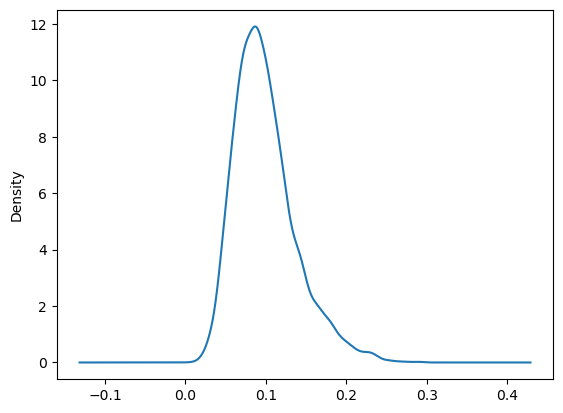

In [14]:
ax = df_brev['divergence_surprise'].plot.kde()